# K Nearest Neighbors

## Choosing K
The choice of K is very important to the performance of KNN. The simplest choice is to set K = 1, known as the 1-nearest neighbor classifier. The prediction is intuitive: it is based on finding the data record in the training set most similar to the new record to  be  predicted.  Setting  K = 1  is  rarely  the  best  choice;  you’ll  almost  always  obtain superior performance by using K > 1-nearest neighbors.

### Discuss:

What is the problem if we choose a very low K value (for exmaple, 1)?



What is the problem if we choose a very large K value (for example, we have 100 smaples and we choose K to be 50)?


*******************************************************************************************************
K=1 problem: 1 noise sample can destroy algorithm, change decision boundary 
OVERFITTING
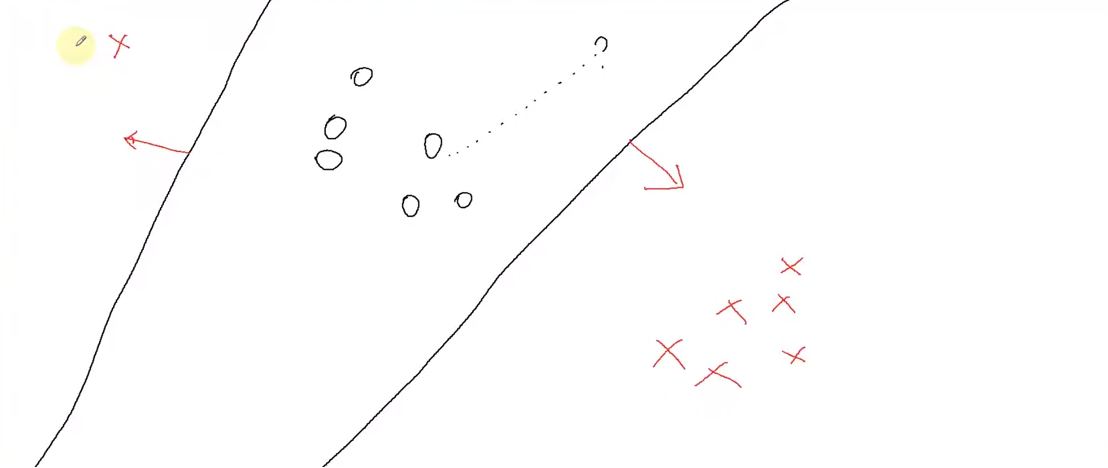


Very large K value: 100 samples with k=50. <br>
    Model will be slower
    
 OVERSMOOTHING Underfitting 
 
 Class A will get all the votes
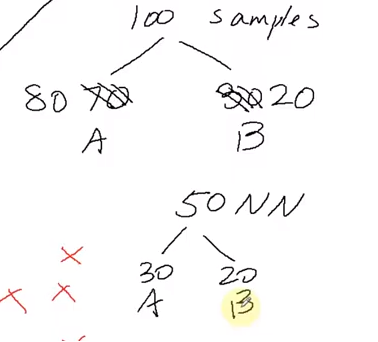
 


The  K  that  best  balances  between  overfitting  and  oversmoothing  is  typically  determined  by  accuracy  metrics  and,  in  particular,  accuracy  with  holdout  or  validation data. There is no general rule about the best K—it depends greatly on the nature of the  data.  

For  *highly  structured  data  with  little  noise*,  smaller  values  of  K  work  best. Borrowing a term from the signal processing community, this type of data is sometimes referred to as having a high signal-to-noise ratio (**SNR**). Examples of data with typically high SNR are handwriting and speech recognition. 

For *noisy data with less structure* (data with a low SNR), such as the loan data, larger values of K are appropriate. Typically, values of K fall in the range 1 to 20. Often, an odd number is chosen to avoid ties.


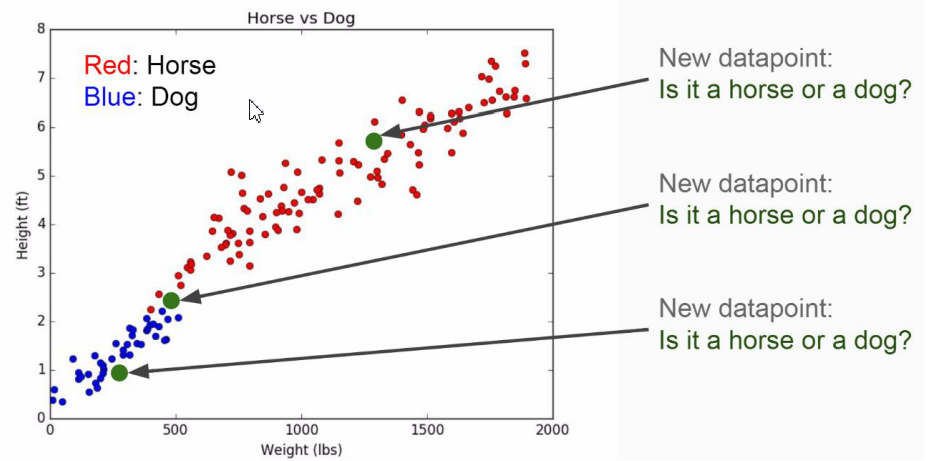

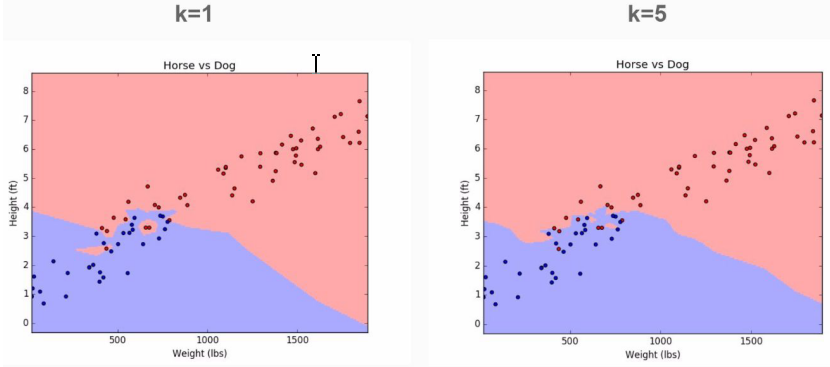

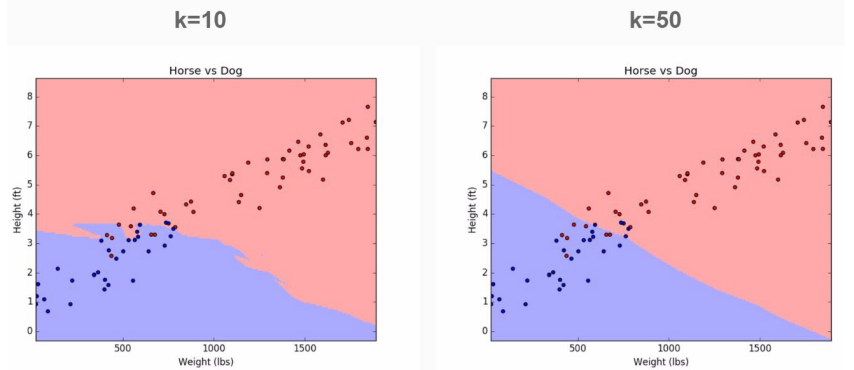

We will use the same data set to discuss the process of choosing the K value.

Below are the code we have done in past two lectures:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("datasets/Classified_Data",index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

where 
- **u** is the mean of the training samples or zero if with_mean=False, and 
- **s** is the standard deviation of the training samples or one if with_std=False.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
# perform the standardization to all the features of the dataset
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [8]:
# Re-create the feature dataframe
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30,random_state =101)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# try k =1 first, then we will use elbow method to choose the k value
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [14]:
pred = knn.predict(X_test)

In [15]:
# predicted values, 0s and 1s as we expected, but not so readable...
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,pred))

[[151   8]
 [ 15 126]]


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Choosing a K Value

Let's go ahead and use the *elbow method* to pick a good K Value:

In [19]:
error_rate = []

# Will take some time
for i in range(1,40): #1-39 bc 40 excluded
    # create a knn classifier with n_neighbors equals i
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    # calculate the error rate and append to the error_rate list
    error_rate.append(np.mean(pred_i != y_test)) #error rate- how many samples are misclassified/samples used

In [20]:
error_rate

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05]

Text(0, 0.5, 'Error Rate')

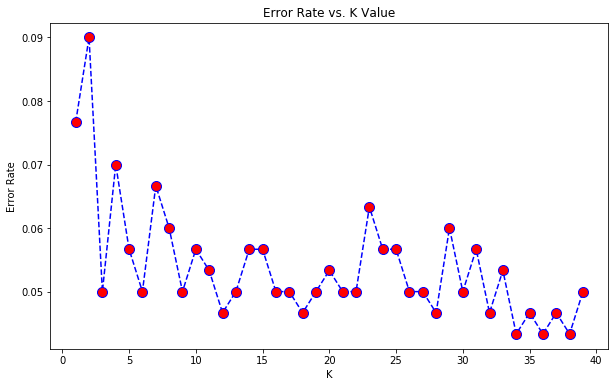

In [21]:
plt.figure(figsize=(10,6))
# use 1-40 as x axis ans error_rate as y axis
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#34-37 very good error rate, but too big for slow model
#5% error rate around 16-19 K
#Also can change random state with a few diff. values, get better idea of which are you can pick Good K value
#would look for more information about data set to select 

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

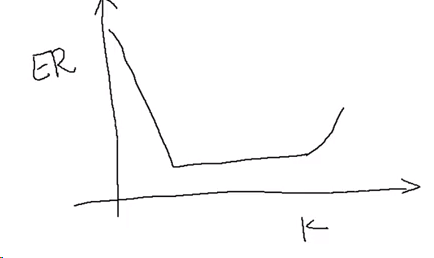


In [22]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[151   8]
 [ 15 126]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [23]:
# NOW WITH K=24
knn = KNeighborsClassifier(n_neighbors=24)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=24')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=24


[[153   6]
 [ 11 130]]


              precision    recall  f1-score   support

           0       0.93      0.96      0.95       159
           1       0.96      0.92      0.94       141

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



### Exercise:

Do an elbow function for the false positive rate on the <font color='blue'>loan</font> data we used yesterday.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
loans = pd.read_csv('datasets/loan_data.csv')
cat_feats = ['purpose']

# drop_first parameter: Whether to get k-1 dummies out of k categorical levels by removing the first level.
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True) 



In [30]:
# create a scaler and fit the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# perform the standardization to all the features of the dataset
scaled_features = scaler.fit_transform(final_data.drop('not.fully.paid',axis=1))

# check the scaled_features
#scaled_features

In [24]:
columns = list(final_data.columns)

# remove the 'not.fully.paid' from the "columns" list
columns.remove('not.fully.paid')

In [25]:
# Re-create the feature dataframe,
# you can call pd.DataFrame with two parameters, first parameter is scaled_features, the second parameter is "columns = columns"

scaled_features = pd.DataFrame(scaled_features,columns=columns) #now put scaled features (2D array) Back into Dataframe


In [26]:
# train-test split
from sklearn.model_selection import train_test_split
#X = scaled_features
#y = loans['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(scaled_features,loans['not.fully.paid'],
                                                    test_size=0.30, random_state=101)


In [36]:
y_test = y_test.tolist() #have to put y_test in list so can call y_test[j]

In [37]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

# Will take some time
for i in range(1,40): 
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
   
    # calculate the error rate and append to the error_rate list
    false_positive_count=0
    for j in range(len(pred_i)):
        if pred_i[j]==1 and y_test[j]==0:
            
            false_positive_count+=1
    error_rate.append(false_positive_count/len(pred_i)) #error rate- how many samples are misclassified/samples used

if sample is predicted to be 1 (positive), but actually it is a 0 in y_test: this means false positive.

False positive: pred_i==1 and y_test==0

Text(0, 0.5, 'Error Rate')

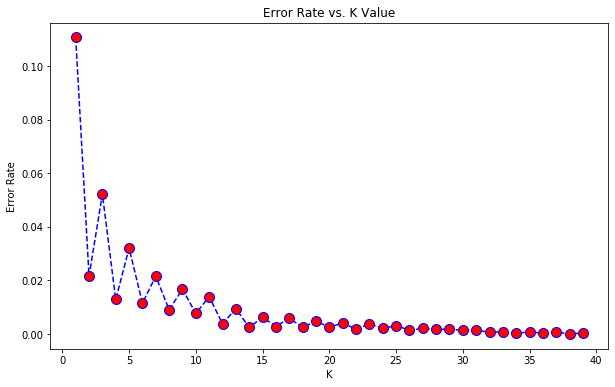

In [38]:
plt.figure(figsize=(10,6))
# use 1-40 as x axis ans error_rate as y axis
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

25 false positive very stable. We want to pick a K value where is stays low
<br> 20-25 best K value

## To sum up:
- Choosing K value:
    - if K is too small: overfitting, sensitive to noice
        - but okay if the dataset if the dataset has low SNR
    - if K is too big: overfitting, ignores the local structures
- Elbow method
    - increase the K
    - the error rate usually becomes lower, then higher again
    - choose the K at the "elbow"